In [525]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import math

C:\Users\84866\AppData\Local\Temp\ipykernel_21668\565527347.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(all_points[:, 0], all_points[:, 1], c='b', cmap='viridis')


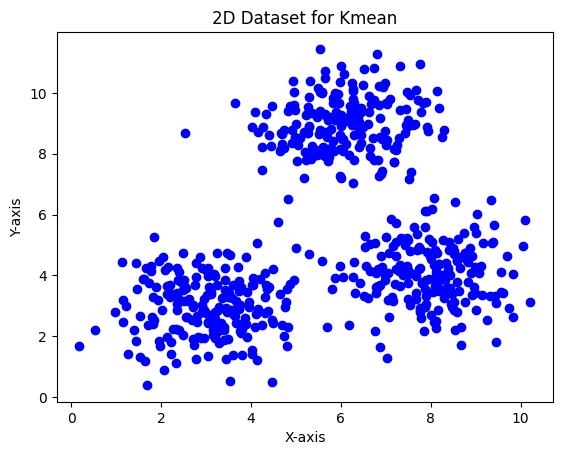

In [526]:
# np.random.seed(42)
n_points = 200
class1_points = np.random.normal(loc=[3,3], scale=[1,1], size=(n_points, 2))
class2_points = np.random.normal(loc=[6,9], scale=[1,1], size=(n_points, 2))
class3_points = np.random.normal(loc=[8,4], scale=[1,1], size=(n_points, 2))
all_points = np.concatenate([class1_points, class2_points, class3_points])


plt.scatter(all_points[:, 0], all_points[:, 1], c='b', cmap='viridis')
plt.title('2D Dataset for Kmean')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [527]:
X = all_points
k = 3

In [528]:
class KMean:
    def __init__(self, k):
        self.k = k
    def init_centroids(self, X, k):
        return X[np.random.choice(X.shape[0], k, replace=True)]
    def converged(self, labels, pred_labels):
        return np.all((labels - pred_labels) == 0)
    def fit(self,X):
        self.X = X
        centroids = self.init_centroids(X, k)
        index = 0
        self.labels = []
        self.centroids_lst = []
        self.centroids_lst.append(centroids)
        D = cdist(X, centroids)
        self.labels.append(np.argmin(D,axis = 1))
        while True:
            if index > 0:
                if self.converged(self.labels[index], self.labels[index - 1]):
                    break   
            centroids = np.zeros_like(self.centroids_lst[-1])
            for j in range(k):
                centroids[j, :] = np.mean(X[np.where(self.labels[index]==j)], axis=0)
            self.centroids_lst.append(centroids)
            D = cdist(X, centroids)
            self.labels.append(np.argmin(D,axis = 1))
            index += 1

In [529]:
kmean = KMean(k = 3)
kmean.fit(X)
centroids_lst = kmean.centroids_lst
labels = kmean.labels

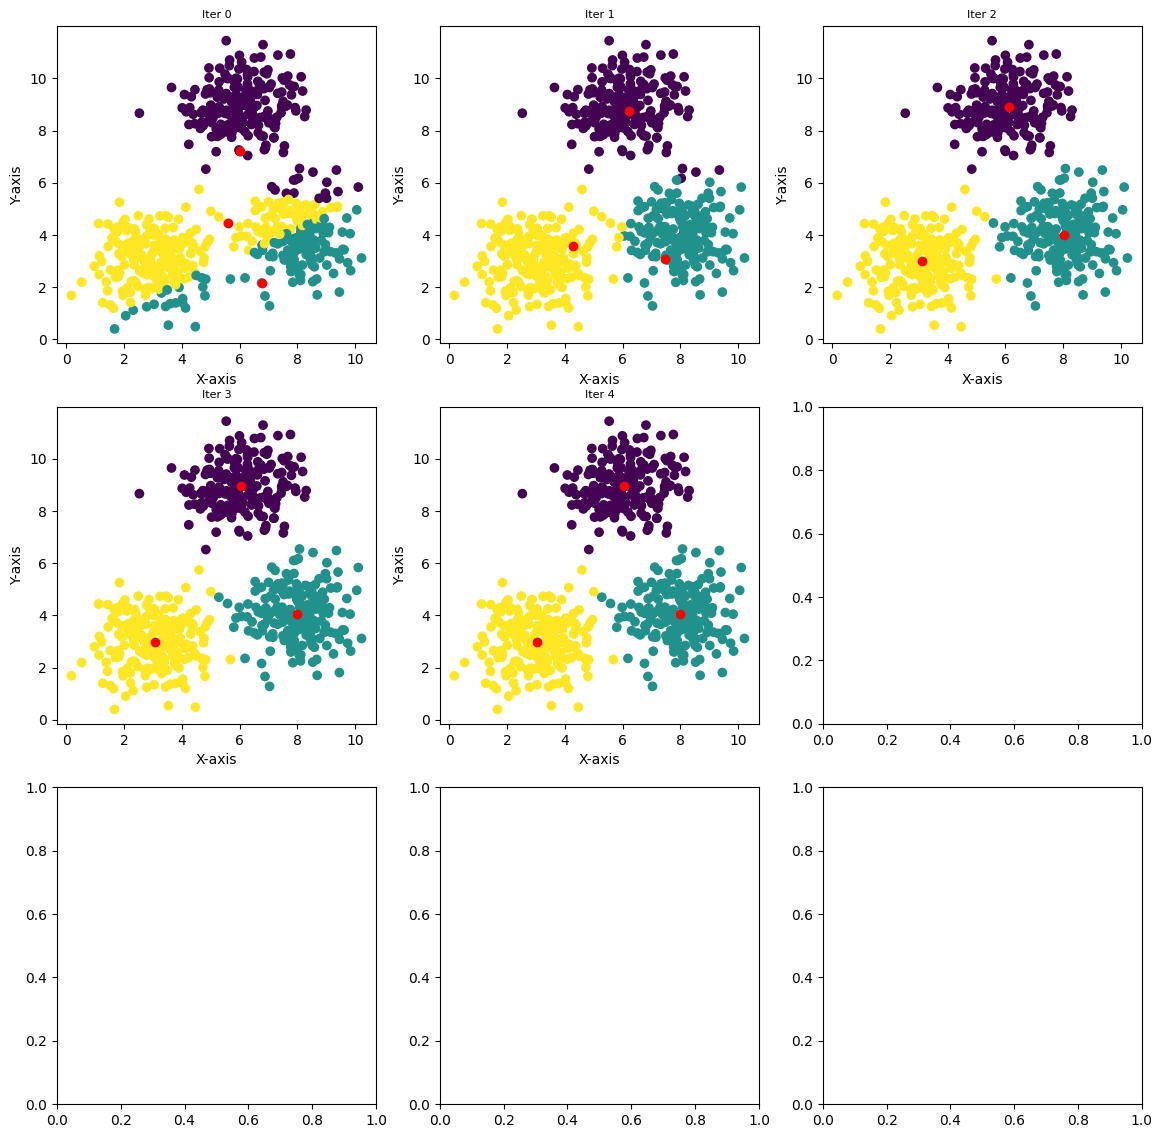

In [530]:
fig, axs = plt.subplots(3, 3, figsize = (14, 14))
for index, label in enumerate(labels):
    axs[math.floor(index / 3), index % 3].scatter(all_points[:, 0], all_points[:, 1], c=label, cmap='viridis')
    axs[math.floor(index / 3), index % 3].scatter(centroids_lst[index][:, 0], centroids_lst[index][:, 1], c='r')
    axs[math.floor(index / 3), index % 3].set_title(f'Iter {index}', fontsize = 8)
    axs[math.floor(index / 3), index % 3].set_xlabel('X-axis')
    axs[math.floor(index / 3), index % 3].set_ylabel('Y-axis')
plt.show()